In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg

In [3]:
#Loading our adta
# pd.set_option('display.max_columns', None) # All columns
# pd.set_option('display.max_rows', None) # All rows
data = pd.read_csv("cardio_train.csv", sep = ';') #we can change this database file if we want
data.drop(columns = ["id"], inplace = True)
data["age"] = data["age"]/365
print('Number of rows : ', data.shape[0], ',  number of features : ', data.shape[1]) 

Number of rows :  70000 ,  number of features :  12


# MISSING VALUES

In [4]:
print('Missing values in our Cardiovascular dataset?:', data.isnull().values.any())

Missing values in our Cardiovascular dataset?: False


In [5]:
(data == "?").sum(axis=0);

C:\Users\hugoc\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
(data < 0).sum(axis=0);

# DUMMIES

In [7]:
gluc_dummies = pd.get_dummies(data.gluc)
cholesterol_dummies = pd.get_dummies(data.cholesterol)

data = data.drop(columns=['gluc', 'cholesterol'])
data = data.merge(gluc_dummies,left_index=True,right_index=True)
data = data.merge(cholesterol_dummies,left_index=True,right_index=True)

In [8]:
data.rename(columns = {'1_x':'gluc1', '2_x':'gluc2', '3_x':'gluc3', '1_y':'chol1', '2_y':'chol2', '3_y':'chol3'}, inplace = True)

# TRANSFORM GENDER

In [9]:
data['Gender'] = (data.gender.values > 1).astype(np.uint8)

In [10]:
data = data.drop(columns=['gender'])

In [11]:
data_with_outliers = data

# MISSENSE VALUES

GENERA STROKES

In [12]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1234 cases


In [13]:
Index_label = data[data['ap_lo']>data['ap_hi']].index.tolist()
Index_label2 = data[data['ap_lo']<=0].index.tolist()

In [14]:
print(data.shape)
data.drop(Index_label, inplace= True)
print('Dropping rows with ap_lo > ap_hi . . .') 
print(data.shape)
print('Dropping rows with ap_lo <= 0 . . .') 
data.drop(Index_label2, inplace= True)
print(data.shape)

(70000, 16)
Dropping rows with ap_lo > ap_hi . . .
(68766, 16)
Dropping rows with ap_lo <= 0 . . .
(68744, 16)


# OUTLIERS

In [15]:
for feature in list(data.columns):
    
    if feature != "alco" and feature != "smoke" and feature != "Gender" and feature != "active" and feature != "cardio" and feature != "gluc1" and feature != "gluc2" and feature != "gluc3" and feature != "chol1" and feature != "chol2" and feature != "chol3":
      outliers = []
      
      attribute = data[feature].values
      mean_attribute = np.mean(attribute)
      std_attribute = np.std(attribute)

      print('Mean of :', feature , ' = ' , mean_attribute, 'and the Std of ',
            feature , ' = ' , std_attribute);

      #Calculation of the outliers
      for i in attribute:
          z_attribute = (i-mean_attribute)/std_attribute
          if z_attribute > 2.5:
              outliers.append(i)
          if z_attribute < (-2.5) and i != 0:
              outliers.append(i)
      print('Outlier in ', feature , ' = ' ,len(outliers));
      print('');

Mean of : age  =  53.32646260336145 and the Std of  age  =  6.762172136353115
Outlier in  age  =  4

Mean of : height  =  164.35985686023508 and the Std of  height  =  8.190781864721151
Outlier in  height  =  878

Mean of : weight  =  74.11684656115445 and the Std of  weight  =  14.331642711754071
Outlier in  weight  =  1475

Mean of : ap_hi  =  128.77529675317118 and the Std of  ap_hi  =  155.05851221040635
Outlier in  ap_hi  =  32

Mean of : ap_lo  =  81.27279471662982 and the Std of  ap_lo  =  9.57366023705462
Outlier in  ap_lo  =  773



In [16]:
features_to_compare = []
for feature in list(data.columns):
  if feature != "alco" and feature != "smoke" and feature != "Gender" and feature != "active" and feature != "cardio" and feature != "gluc1" and feature != "gluc2" and feature != "gluc3" and feature != "chol1" and feature != "chol2" and feature != "chol3":
    features_to_compare.append(feature)
print('Features to compare before and after outlier correction : ', features_to_compare)

Features to compare before and after outlier correction :  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


In [17]:
ji = 0
listano = ["alco", "smoke", "Gender", "active", "cardio", "gluc1", "gluc2", "gluc3", "chol1", "chol2", "chol3"]
for i in data.columns: 
  if i not in listano:
      print(i)
      media = data[i].mean()
      standard = data[i].std()
        
      for e in data[i].values:        
          z = (e-media)/standard
          
          if -2.5 > z or z > 2.5: 
              ji = ji + 1
              data.drop(data[(data[i]-data[i].mean())/data[i].std() > 3].index, inplace = True) 
              data.drop(data[(data[i]-data[i].mean())/data[i].std() < -3].index, inplace = True)

age
height
weight
ap_hi
ap_lo


In [18]:
print('Number of patients from database with no outliers: ', data.shape[0])

Number of patients from database with no outliers:  65820


# Plots to compare before and after outlier detection.

### Take care of axis unit

In [47]:
data.shape

(65820, 16)

In [48]:
data_with_outliers.shape

(65820, 16)

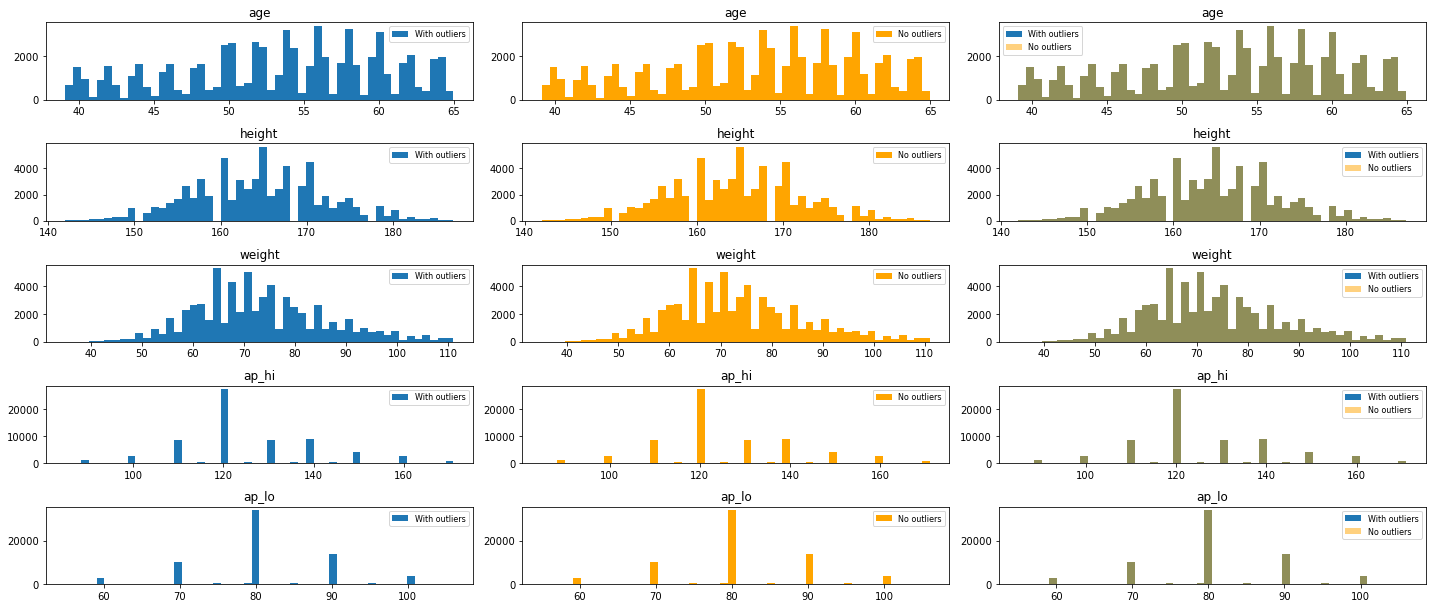

In [49]:
plt.figure(figsize = (20,10))
i = 1
for feature in features_to_compare:
    plt.subplot(6,3,i)
    plt.hist(data_with_outliers[feature], bins = 50 ,label = "With outliers")
    i += 1
    plt.legend(prop={"size":8})
    plt.title(feature)
    plt.subplot(6,3,i)
    plt.hist(data[feature], bins = 50 ,label = "No outliers", color = 'orange')
    plt.legend(prop={"size":8})
    plt.title(feature)
    i += 1
    plt.subplot(6,3,i)
    plt.hist(data_with_outliers[feature], bins = 50 ,label = "With outliers" )   
    plt.hist(data[feature], bins = 50 ,label = "No outliers", color = 'orange', alpha = 0.5)
    plt.legend(prop={"size":8})
    plt.title(feature)
    i += 1
plt.tight_layout()

# EDA

In [19]:
data['BMI'] = data['weight']/((data['height']/100)**2)
data['ap_mean'] = (2*data['ap_lo'] + data["ap_hi"])/3

In [ ]:
data.describe()

In [ ]:
for i in list(data.columns):
    n = len(pd.unique(data[i]))
    print('Number of unique values in column : ', i , ' = ' , n)

In [ ]:
#histogram
Complete_histogram = data.hist(figsize=(20,30),layout=(8,3), bins = 100, column = list(data.columns), 
                               xlabelsize = 8, ylabelsize = 8)

In [ ]:
healthy = data[data["cardio"] == 0]
ill = data[data["cardio"] == 1]

In [ ]:
plt.figure(figsize = (20,20))
i = 1

for feature in data.columns:
    plt.subplot(7,3,i)
    plt.hist(ill[feature], alpha=0.5, label='ill')
    plt.hist(healthy[feature], alpha=0.5, label='healthy')
    plt.legend(loc='upper right')
    plt.title(feature)

    i += 1
plt.tight_layout()

In [ ]:
plt.figure(figsize = (30,10))
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = data['age'].astype('int')
del data["age"]
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

In [20]:
df = data

X = df.drop(['cardio'],axis=1).copy()
y = df['cardio']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_train_norm = pd.DataFrame(data = x_train_norm, columns = x_train.columns)
x_test_norm = scaler.transform(x_test)
x_test_norm = pd.DataFrame(data = x_test_norm, columns = x_train.columns)

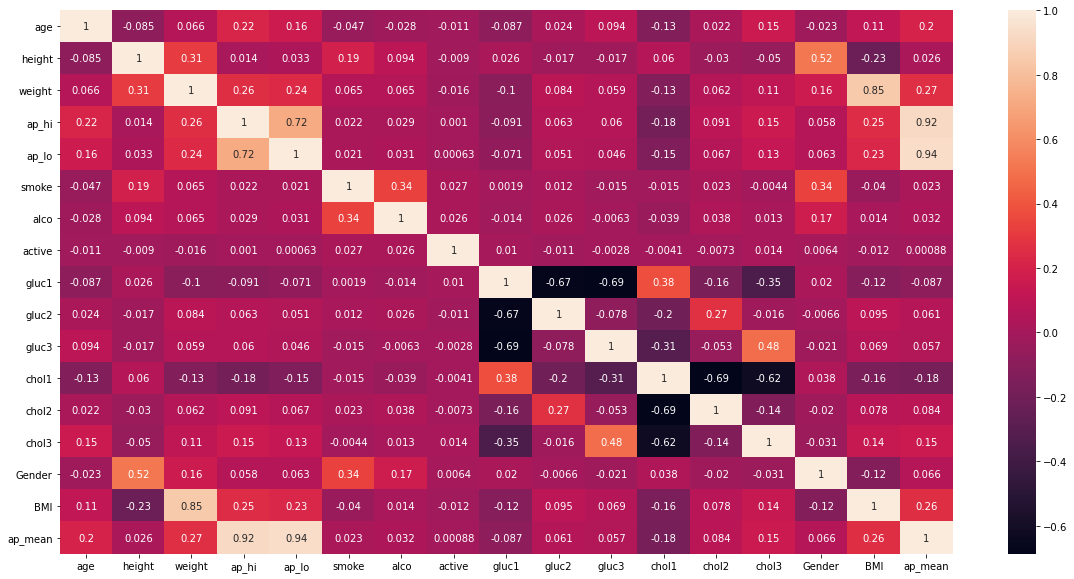

In [20]:
plt.figure(figsize = [20,10])
sns.heatmap(X.corr(), annot=True)
plt.show()

---

# CLUSTERING + PCA

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from sklearn.decomposition import PCA

([<matplotlib.axis.XTick at 0x20a99c67520>,
 <a list of 17 Text major ticklabel objects>)

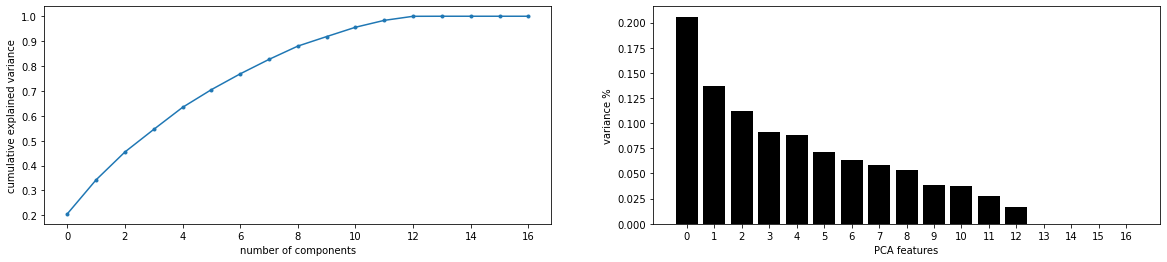

In [50]:
# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(1,2,2)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(range(pca.n_components_))

C:\Users\hugoc\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


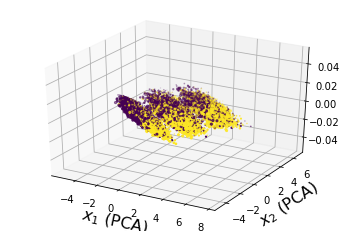

In [51]:
# Data visualization (just 2 components)

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=y)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.show()

In [52]:
pca.explained_variance_

array([3.49896233, 2.32613806, 1.90275754])

In [53]:
print(abs( pca.components_ ))

[[0.16557387 0.00520921 0.28053257 0.40468658 0.39107922 0.02178682
  0.03788176 0.00333478 0.25852477 0.15432293 0.19622062 0.30678909
  0.15702404 0.24948764 0.02668995 0.28432788 0.42836504]
 [0.00970217 0.19288464 0.14633209 0.27679343 0.30162453 0.11587567
  0.07218275 0.00506866 0.43781538 0.23691932 0.35618437 0.35244312
  0.17915527 0.28794491 0.20328699 0.04456331 0.31275587]
 [0.13144107 0.49718231 0.15836646 0.12477054 0.12159114 0.44629699
  0.33286559 0.01803308 0.15847196 0.13282473 0.0829091  0.08843744
  0.08727722 0.02669438 0.52332081 0.11203284 0.1326592 ]]


In [54]:
from src.ddbb import load_pima_indian
from src.utils import plot_scatter, plot_silhouette

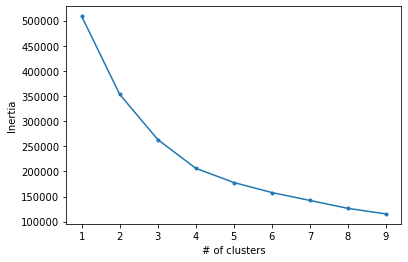

In [57]:
#Choosing K

K = range(1,10)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_pca)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [58]:
range_n_clusters = [3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.34019724443702876
For n_clusters = 4 The average silhouette_score is : 0.33968342556234976
For n_clusters = 5 The average silhouette_score is : 0.3115391467413974
For n_clusters = 6 The average silhouette_score is : 0.32005883215252295
For n_clusters = 7 The average silhouette_score is : 0.3271236196965222


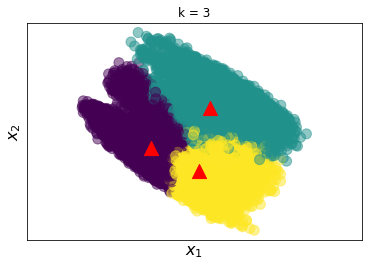

In [61]:
k = 3

kmeans = KMeans(n_clusters = k).fit(X_pca)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X_pca,'k = ' + str(k), cluster_labels, centroids)
plt.show()

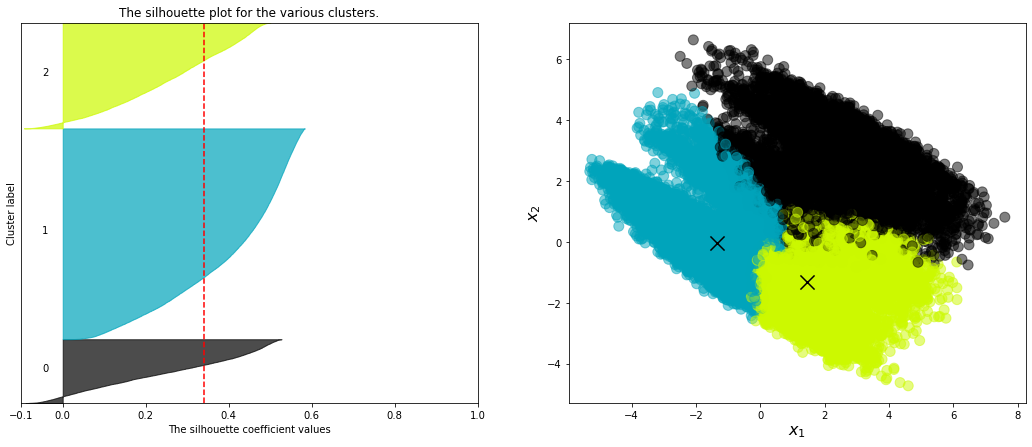

In [62]:
kmeans = KMeans(n_clusters=k).fit(X_pca)
plot_silhouette(X_pca, k, kmeans.labels_, kmeans.cluster_centers_)

In [63]:
locura = pd.concat([X.reset_index(drop = True), pd.DataFrame(X_pca)], axis = 1)
locura.columns.values[-3:] = ["PCA 1", "PCA 2", "PCA 3"]
locura["K means"] =  kmeans.labels_
locura["K means"] = locura["K means"].map({0:"first", 1:"second", 2:"third"})

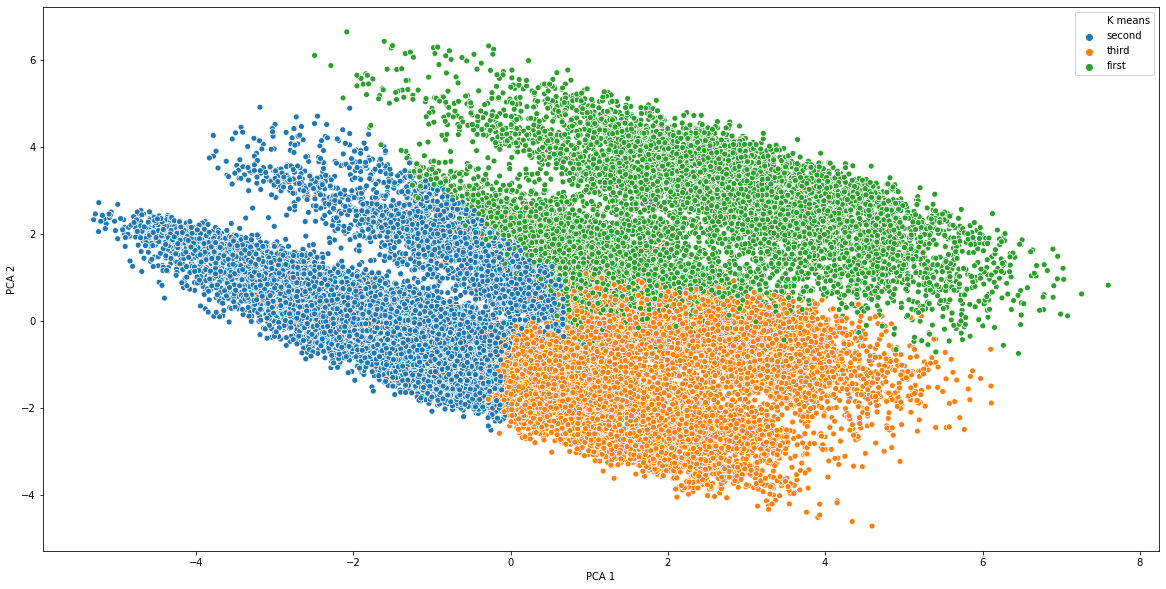

In [64]:
plt.figure(figsize = (20,10))
sns.scatterplot(locura["PCA 1"], locura["PCA 2"], hue = locura["K means"])
plt.show()

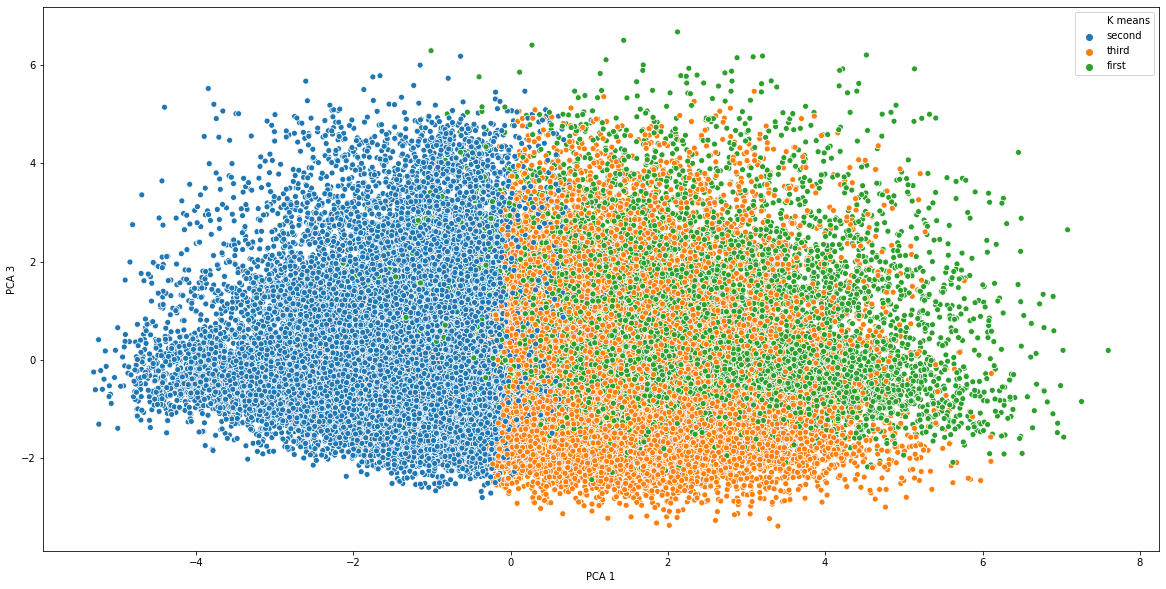

In [65]:
plt.figure(figsize = (20,10))
sns.scatterplot(locura["PCA 1"], locura["PCA 3"], hue = locura["K means"])
plt.show()

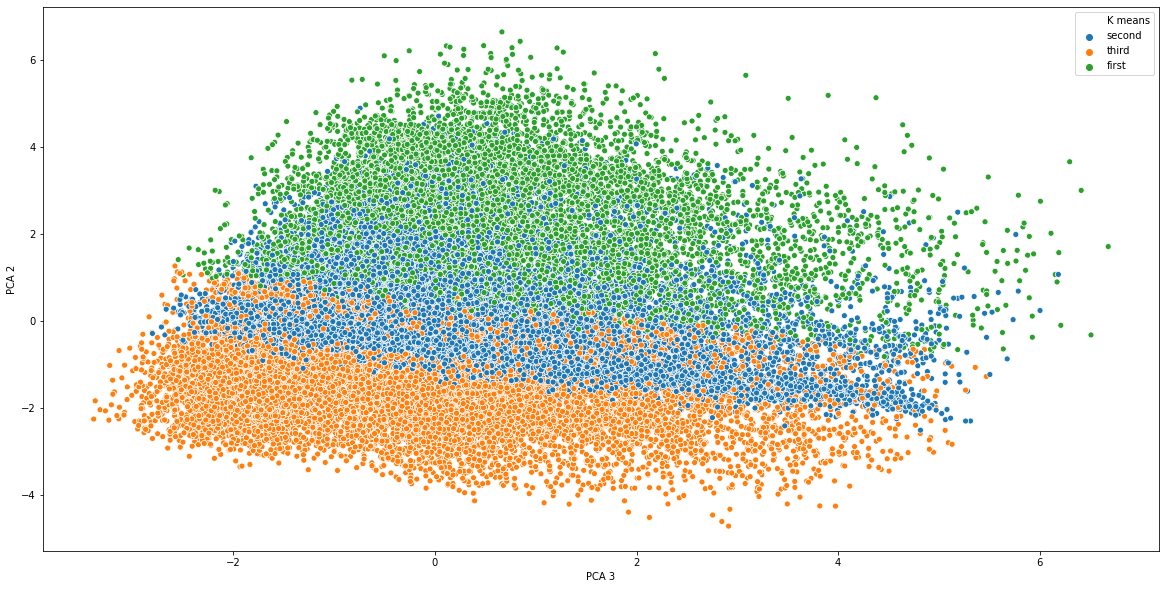

In [66]:
plt.figure(figsize = (20,10))
sns.scatterplot(locura["PCA 3"], locura["PCA 2"], hue = locura["K means"])
plt.show()

# FEATURE SELECTION

## FILTER METHODS



In [ ]:
def ftest(X, y, feat_names, rotation=False):
    
    angle = 0
    if rotation:
        angle = 90
        
    # do calculations
    f_test, Pval = f_classif(X, y)
    f_test /= np.max(f_test)

    plt.figure(figsize=(20, 4))
    plt.bar(range(X.shape[1]),f_test,  align="center")
    plt.xticks(range(X.shape[1]),feat_names, rotation = angle)
    plt.xlabel('Selected features')
    plt.ylabel('F-test Score')
    plt.title('$F-test$ Feature Selection')
    
    plt.show()
    
    return f_test

In [ ]:
feat_names = x_train.columns
f_res = ftest(x_train_norm, y_train,feat_names, rotation = True)

zipf = zip(f_res, X.columns)
zipf = sorted(zipf, key = lambda t: t[0], reverse = True)
zipf = zip(*zipf)

In [ ]:
#@title
fselection = list(zip(zipf))
fselection = fselection[1][0][0:3]

In [ ]:
fselection

In [ ]:
#@title
def mi(X, y, feat_names, rotation=False):
    
    angle = 0
    if rotation:
        angle = 90
        
    # do calculations
    mutual = mutual_info_classif(X, y)
    mutual /= np.max(mutual)

    plt.figure(figsize=(20, 4))
    plt.bar(range(X.shape[1]),mutual,  align="center")
    plt.xticks(range(X.shape[1]),feat_names, rotation = angle)
    plt.xlabel('Selected features')
    plt.ylabel('Mutual Information Score')
    plt.title('$Mutual Information$ Feature Selection')
    
    plt.show()
    
    return mutual

In [ ]:
feat_names = x_train.columns
mi_res = mi(x_train_norm, y_train,feat_names, rotation = True)

zipmi = zip(mi_res, X.columns)
zipmi = sorted(zipmi, key = lambda t: t[0], reverse = True)
zipmi = zip(*zipmi)

In [ ]:
miselection = list(zip(zipmi))
miselection = miselection[1][0][0:4]

In [ ]:
fselection = list(fselection)
fselection.append("---")

## EMBEDDED

### DT

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), {
    "criterion": ["gini", "entropy"],
    "max_depth": [2,5,10,15],
    "min_samples_split": [5,10,15,20,25],
    "min_samples_leaf": [5,10,15,20,25]
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train)

dt_params = clf.best_params_
dt_params

In [ ]:
features = X.columns
dt = DecisionTreeClassifier(**dt_params)
dt.fit(x_train, y_train)

dt_imp = dt.feature_importances_
dt_score= zip(dt_imp, features)
dt_score = sorted(dt_score, key = lambda t: t[0], reverse = True)

In [ ]:
dt_score = zip(*dt_score)
dtlist = list(zip(dt_score))
dtval = dtlist[1][0][0]
dtscores = dtlist[0][0][0:8]

plt.figure(figsize=(20, 10))
plt.bar(range(len(dtscores)),dtscores,  align="center")
plt.xticks(range(len(dtscores)),dtval, rotation = 90)
plt.xlabel('Selected features')
plt.ylabel('Decision Tree Scores')
plt.title('$Decision Tree$ Feature Selection')

In [ ]:
embedded_dt_selection = ["ap_hi"]

### RF

In [21]:
clf2 = GridSearchCV(RandomForestClassifier(), {"n_estimators":np.arange(1,100,10),
    "criterion": ["gini", "entropy"],
    "max_depth": [2,5,10],
    "min_samples_split": np.arange(5,50,10),
    "min_samples_leaf": np.arange(5,100,10)}, cv=5, return_train_score=False)
clf2.fit(x_train, y_train)

rf_params = clf2.best_params_
rf_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 61}

In [32]:
rforest = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 15, n_estimators = 61)
rforest.fit(x_train, y_train)

features = X.columns
rf_imp = rforest.feature_importances_
rf_score= zip(rf_imp, features)
rf_score = sorted(rf_score, key = lambda t: t[0], reverse = True)

In [33]:
rf_score = zip(*rf_score)
rflist = list(zip(rf_score))
rfval = rflist[1][0][0:4]
rfscores = rflist[0][0][0:4]

In [34]:
rfscores

(0.29690419706563176,
 0.2277425663270749,
 0.1352630015195631,
 0.12901704214799867)

Text(0.5, 1.0, '$Random Forest$ Feature Selection')

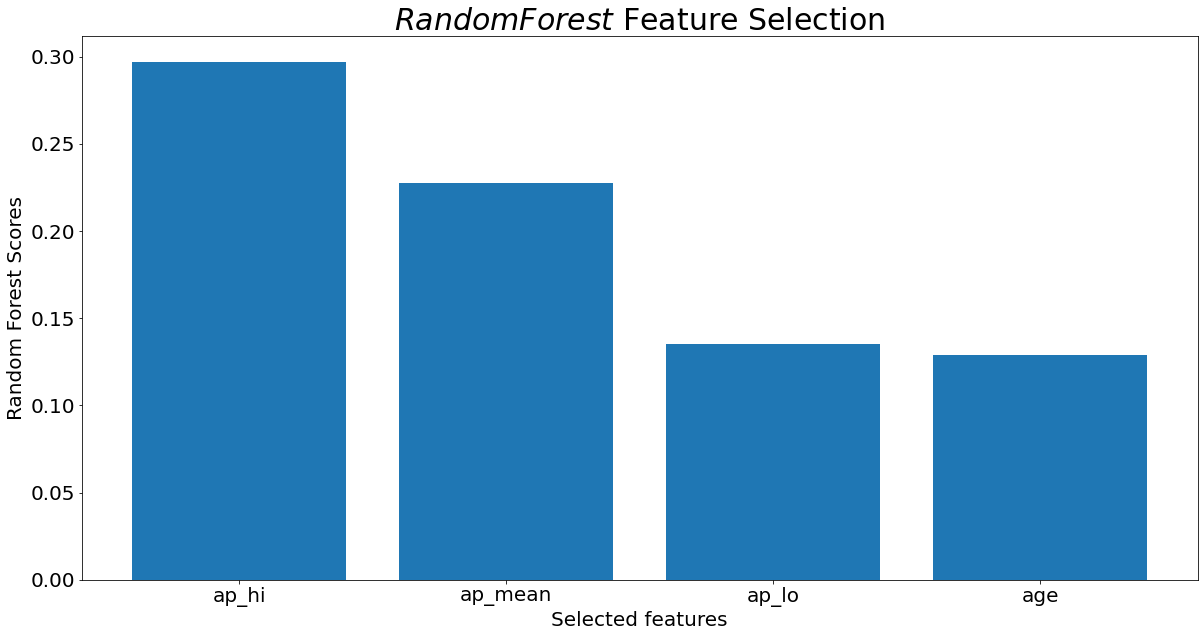

In [35]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(rfscores)),rfscores,  align="center")
plt.xticks(range(len(rfscores)),rfval, fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Selected features', fontsize = 20)
plt.ylabel('Random Forest Scores', fontsize = 20)
plt.title('$Random Forest$ Feature Selection', fontsize = 30)

In [ ]:
embedded_rf_selection =

### LR LASSO

In [ ]:
clf3 = GridSearchCV(LogisticRegression(max_iter = 1000), {"C": [0.01, 0.001, 0.1, 1, 10]}, cv=5, return_train_score=False)
clf3.fit(x_train, y_train)
lr_params = clf3.best_params_

In [ ]:
model = LogisticRegression(**lr_params, penalty='l1', solver='liblinear', max_iter = 1000)
model.fit(x_train, y_train)

importance = []
e = 0   
for i in model.coef_[0]:
    lista = []
    lista.append(np.abs(i))
    importance.append(lista)

lasso_lr_score = zip(importance, X.columns)
lasso_lr_score = sorted(lasso_lr_score, key = lambda t: t[0], reverse=True)

In [ ]:
lasso_lr_score = zip(*lasso_lr_score)
lrlist = list(zip(lasso_lr_score))

In [ ]:
for i in lrlist:
  print(i)

In [ ]:
lrval = lrlist[1][0][0:6]
lrscores = lrlist[0][0][0:6]
lrscores = [i[0] for i in lrscores]

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(lrscores)),lrscores,  align="center")
plt.xticks(range(14),lrval, rotation = 90)
plt.xlabel('Selected features')
plt.ylabel('Penalized Logistic Regression Scores')
plt.title('$Penalized Logistic Regression$ Feature Selection')

In [ ]:
rfe_list = ["-","-","-","-","-","-","-","-","-","-","-"]
rfe_list[0:4] = rfval
dte_list = ["-","-","-","-","-","-","-","-","-","-","-"]
dte_list[0] = dtval
lre_list = ["-","-","-","-","-","-","-","-","-","-","-"]
lre_list[0:6] = lrval

## WRAPPER

In [ ]:
clf4 = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": np.arange(1,200,5)}, cv=5, return_train_score=False)
clf4.fit(x_train, y_train)
knn_params = clf4.best_params_
knn = KNeighborsClassifier(**knn_params)

In [ ]:
x_train_norm = np.array(x_train_norm)
y_train = np.array(y_train)

In [ ]:
### KNN

N, D = x_train_norm.shape

dt = DecisionTreeClassifier(**dt_params, random_state = 8)
kf = KFold(n_splits=5, shuffle = True, random_state = 8)

cv_error = []
cv_std = []

for n in range(1, D+1, 1):
        
    error_i = []
    for train, validation in kf.split(x_train_norm):
        
        #-- ranking: two options

        # option 2: feature importance
        ranking = dt.fit(x_train_norm[train],y_train[train]).feature_importances_
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)]
        Xs = x_train_norm[:,selected]
        
        #-- fit on selected features
        
        knn.fit(Xs[train],y_train[train])
        prediction = knn.predict(Xs[validation])
        error = mean_squared_error(y_train[validation], prediction)
        error_i.append(error) 
            
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str((D-n+1)) + ' MSE ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

plt.figure(figsize = [20,10])
plt.plot(range(D, 0,-1),cv_error,'-o')
plt.errorbar(range(D,0,-1), cv_error, yerr=cv_std, fmt='o')
plt.title("Wrapper Method: KNN")
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

In [ ]:
index_knn = 20 - cv_error.index(min(cv_error))
index_knn

In [ ]:
### LR

N, D = x_train_norm.shape

dt = DecisionTreeClassifier(**dt_params,random_state=8)
kf = KFold(n_splits=3, shuffle = True, random_state=8)

cv_error = []
cv_std = []

for n in range(1, D+1, 1):
        
    error_i = []
    for train, validation in kf.split(x_train_norm):
        
        #-- ranking: two options

        # option 2: feature importance
        ranking = dt.fit(x_train_norm[train],y_train[train]).feature_importances_
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)]
        Xs = x_train_norm[:,selected]
        
        #-- fit on selected features
        lr = LogisticRegression(**lr_params, penalty='l1', solver='liblinear', max_iter = 1000)
        lr.fit(Xs[train],y_train[train])
        prediction = lr.predict(Xs[validation])
        error = mean_squared_error(y_train[validation], prediction)
        error_i.append(error) 
            
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str((D-n+1)) + ' MSE ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

plt.figure(figsize = [20,10])
plt.plot(range(D, 0,-1),cv_error,'-o')
plt.errorbar(range(D,0,-1), cv_error, yerr=cv_std, fmt='o')
plt.title("Wrapper Method: LR")
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

In [ ]:
index_lr = 10

In [ ]:
### DT

N, D = x_train_norm.shape

dt = DecisionTreeClassifier(**dt_params,random_state=8)
kf = KFold(n_splits=3, shuffle = True, random_state=8)

cv_error = []
cv_std = []

for n in range(1, D+1, 1):
        
    error_i = []
    for train, validation in kf.split(x_train_norm):
        
        #-- ranking: two options

        # option 2: feature importance
        ranking = dt.fit(x_train_norm[train],y_train[train]).feature_importances_
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)]
        Xs = x_train_norm[:,selected]
        
        #-- fit on selected features
        dt.fit(Xs[train],y_train[train])
        prediction = dt.predict(Xs[validation])
        error = mean_squared_error(y_train[validation], prediction)
        error_i.append(error) 
            
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str((D-n+1)) + ' MSE ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

plt.figure(figsize = [20,10])
plt.plot(range(D, 0,-1),cv_error,'-o')
plt.errorbar(range(D,0,-1), cv_error, yerr=cv_std, fmt='o')
plt.title("Wrapper Method: DT")
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

In [ ]:
index_dt = 5

In [ ]:
ranking = dt.fit(x_train_norm[train],y_train[train]).feature_importances_

In [ ]:
knn_wrapper_score = zip(ranking, X.columns)
knn_wrapper_score = sorted(knn_wrapper_score, key = lambda t: t[0], reverse=True)

knn_wrapper_score = zip(*knn_wrapper_score)
knnwlist = list(zip(knn_wrapper_score))
knnwval = knnwlist[1][0][0:index_knn]
knnwscores = knnwlist[0][0][0:index_knn]

In [ ]:
lr_wrapper_score = zip(ranking, X.columns)
lr_wrapper_score = sorted(lr_wrapper_score, key = lambda t: t[0], reverse=True)

lr_wrapper_score = zip(*lr_wrapper_score)
lrwlist = list(zip(lr_wrapper_score))
lrwval = lrwlist[1][0][0:index_lr]
lrwscores = lrwlist[0][0][0:index_lr]

In [ ]:
dt_wrapper_score = zip(ranking, X.columns)
dt_wrapper_score = sorted(dt_wrapper_score, key = lambda t: t[0], reverse=True)

dt_wrapper_score = zip(*dt_wrapper_score)
dtwlist = list(zip(dt_wrapper_score))
dtwval = dtwlist[1][0][0:index_dt]
dtwscores = dtwlist[0][0][0:index_dt]

In [ ]:
knnw_list = ["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"]
knnw_list[0:index_knn] = knnwval
dtw_list = ["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"]
dtw_list[0:index_dt] = dtwval
lrw_list = ["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"]
lrw_list[0:index_lr] = lrwval

In [ ]:
print(len(knnw_list), len(dtw_list), len(lrw_list))

In [ ]:
wrapper = pd.DataFrame()

wrapper["Decision Trees"] = dtw_list
wrapper["KNN"] = knnw_list
wrapper["Logistic Regression"] = lrw_list
wrapper["Order of importance"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

wrapper.set_index("Order of importance")

In [ ]:
embedded = pd.DataFrame()

embedded["Decision Trees"] = dte_list
embedded["Random Forest"] = rfe_list
embedded["Penalized Logistic Regression"] = lre_list
embedded["Order of importance"] = [0,1,2,3,4,5,6,7,8,9,10]

embedded.set_index("Order of importance")

In [ ]:
#@title
filter_ = pd.DataFrame()

filter_["F Test"] = fselection
filter_["Mutual Information"] = miselection
filter_["Order of importance"] = [1,2,3,4]

filter_.set_index("Order of importance")

# FS EVALUATION

In [20]:
X = df.drop(['cardio'],axis=1).copy()
y = df['cardio']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_train_norm = pd.DataFrame(data = x_train_norm, columns = x_train.columns)
x_test_norm = scaler.transform(x_test)
x_test_norm = pd.DataFrame(data = x_test_norm, columns = x_train.columns)

In [ ]:
fselection = fselection[:-1]

miselection = list(miselection)

rfval = list(rfval)

dtval = ["ap_hi"]

lrval = list(lrval)

knnwval = list(knnwval)

dtwval = list(dtwval)

lrwval = list(lrwval)

subsets = [fselection, miselection,rfval,dtval,lrval, knnwval, dtwval, lrwval]

In [ ]:
for i in subsets:
    print(i)

In [ ]:
def evaluation(classifier,subsets):

    acc_std = []
    classifier = classifier
    
    if classifier == "knn":
        
        param_grid = {"n_neighbors": np.arange(1,200,5)}
        
        #subsets:
        for i in subsets:

            mean_score = 0
            std_score = 0

            #subsets
            Xsub = x_train_norm[i]

            # GridSearchCV
            grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'accuracy')
            grid.fit(Xsub,y_train)
            knn_params = grid.best_params_


            mean_score = cross_val_score(KNeighborsClassifier(**knn_params), Xsub, y_train, scoring="accuracy", cv = 5).mean()
            std_score = cross_val_score(KNeighborsClassifier(**knn_params), Xsub, y_train, scoring="accuracy", cv = 5).std()

            acc_std.append(str(round(mean_score,3))+" +/- "+str(round(std_score,3)))
            
    if classifier == "dt":
        
        param_grid = {"criterion": ["gini", "entropy"],
                      "max_depth": [2,5,10,15],
                      "min_samples_split": [5,10,15,20,25],
                      "min_samples_leaf": [5,10,15,20,25]}
        
        #subsets:
        for i in subsets:

            mean_score = 0
            std_score = 0

            #subsets
            Xsub = x_train_norm[i]

            # GridSearchCV
            
            grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring = 'accuracy')
            grid.fit(Xsub,y_train)
            dt_params = grid.best_params_


            mean_score = cross_val_score(DecisionTreeClassifier(**dt_params), Xsub, y_train, scoring="accuracy", cv = 5).mean()
            std_score = cross_val_score(DecisionTreeClassifier(**dt_params), Xsub, y_train, scoring="accuracy", cv = 5).std()

            acc_std.append(str(round(mean_score,3))+" +/- "+str(round(std_score,3)))

    if classifier == "lr":
        
        param_grid = {"C": [0.01, 0.001, 0.1, 1, 10]}
        
        #subsets:
        for i in subsets:

            mean_score = 0
            std_score = 0

            #subsets
            Xsub = x_train_norm[i]

            # GridSearchCV
            
            grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv = 5, scoring = 'accuracy')
            grid.fit(Xsub,y_train)
            lr_params = grid.best_params_


            mean_score = cross_val_score(LogisticRegression(max_iter = 1000,**lr_params), Xsub, y_train, scoring="accuracy", cv = 5).mean()
            std_score = cross_val_score(LogisticRegression(max_iter = 1000,**lr_params), Xsub, y_train, scoring="accuracy", cv = 5).std()

            acc_std.append(str(round(mean_score,3))+" +/- "+str(round(std_score,3)))
            
    return acc_std

In [ ]:
knnr = evaluation("knn", subsets)

In [ ]:
dtr = evaluation("dt", subsets)

In [ ]:
lrr = evaluation("lr", subsets)

In [ ]:
resultados = pd.DataFrame()

resultados["KNN"] = knnr
resultados["DT"] = dtr
resultados["LR"] = lrr
resultados["Index"] = ["F Test", "Mutual Information", "RF feature importance", "DT feature importance", "LR feature importance",
                      "Knn Wrapper", "DT Wrapper", "LR Wrapper"]

resultados.set_index("Index", inplace = True)

In [ ]:
resultados

# FINAL EVALUATION

## KNN

In [ ]:
param_grid = {'n_neighbors': range(1,30,2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'accuracy')
grid.fit(x_train_norm[dtwval],y_train)
knn_params = grid.best_params_

model = KNeighborsClassifier(**knn_params).fit(x_train_norm[list(dtval)], y_train)

y_pred = model.predict(x_test_norm[list(dtval)])

In [ ]:
acknn = accuracy_score(y_test,y_pred)
print('Accuracy is: ',acknn)

cmknn = confusion_matrix(y_test,y_pred)
sns.heatmap(cmknn,annot=True,fmt="d")

sensitivityknn =  cmknn[0][0]/(cmknn[0][0]+cmknn[1][0])
print('Sensitivity is: ',sensitivityknn)

specificityknn =  cmknn[1][1]/(cmknn[1][1]+cmknn[0][1])
print('Specificity is: ',specificityknn)

In [ ]:
final = pd.DataFrame()

final["KNN"] = [acknn, sensitivityknn, specificityknn]

## LR

In [ ]:
param_grid = {"C": [0.01, 0.001, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv = 5, scoring = 'accuracy')
grid.fit(x_train_norm[knnwval],y_train)
lr_params = grid.best_params_

In [ ]:
model = LogisticRegression(**lr_params,max_iter = 1000).fit(x_train_norm[list(lrval)], y_train)

y_pred = model.predict(x_test_norm[list(lrval)])

In [ ]:
aclr = accuracy_score(y_test,y_pred)
print('Accuracy is: ',aclr)

cmlr = confusion_matrix(y_test,y_pred)
sns.heatmap(cmlr,annot=True,fmt="d")

sensitivitylr =  cmlr[0][0]/(cmlr[0][0]+cmlr[1][0])
print('Sensitivity is: ',sensitivitylr)

specificitylr =  cmlr[1][1]/(cmlr[1][1]+cmlr[0][1])
print('Specificity is: ',specificitylr)

In [ ]:
final["LR"] = [aclr, sensitivitylr, specificitylr]

## DT

In [24]:
dtwval = ["ap_hi", "age", "chol3", "ap_mean", "BMI"]

In [25]:
x_train_norm

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gluc1,gluc2,gluc3,chol1,chol2,chol3,Gender,BMI,ap_mean
0,-0.261532,-0.312848,0.067016,-0.374669,-0.095851,-0.308926,-0.234059,-2.041887,0.413948,-0.277259,-0.284545,-1.753928,2.545495,-0.354472,-0.727862,0.230689,-0.242235
1,0.155593,0.213831,-0.090063,-0.374669,-0.095851,-0.308926,-0.234059,0.489743,0.413948,-0.277259,-0.284545,0.570149,-0.392851,-0.354472,1.373887,-0.209008,-0.242235
2,0.750097,-0.049508,-0.875459,-0.374669,-1.247018,-0.308926,-0.234059,0.489743,-2.415762,-0.277259,3.514387,0.570149,-0.392851,-0.354472,-0.727862,-0.863109,-0.909616
3,1.222298,-0.971196,-0.796919,1.634647,1.055317,-0.308926,-0.234059,0.489743,0.413948,-0.277259,-0.284545,0.570149,-0.392851,-0.354472,1.373887,-0.330133,1.426218
4,-1.969313,1.135518,-0.247142,-0.374669,-0.095851,-0.308926,-0.234059,-2.041887,0.413948,-0.277259,-0.284545,0.570149,-0.392851,-0.354472,-0.727862,-0.791481,-0.242235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46069,1.626868,0.082161,0.930952,0.295103,1.055317,-0.308926,-0.234059,0.489743,-2.415762,-0.277259,3.514387,-1.753928,2.545495,-0.354472,-0.727862,0.873635,0.758837
46070,-0.549874,-0.312848,0.145556,0.964875,2.206484,-0.308926,-0.234059,0.489743,0.413948,-0.277259,-0.284545,0.570149,-0.392851,-0.354472,-0.727862,0.311693,1.759909
46071,-1.792339,0.345501,-0.325682,-0.374669,-0.095851,-0.308926,-0.234059,0.489743,0.413948,-0.277259,-0.284545,0.570149,-0.392851,-0.354472,-0.727862,-0.504010,-0.242235
46072,0.169767,-1.102865,2.501744,0.295103,-0.095851,-0.308926,-0.234059,0.489743,0.413948,-0.277259,-0.284545,-1.753928,2.545495,-0.354472,-0.727862,3.408666,0.091456


In [26]:
param_grid = {"criterion": ["gini", "entropy"],
                      "max_depth": [2,5,10,15],
                      "min_samples_split": [5,10,15,20,25],
                      "min_samples_leaf": [5,10,15,20,25]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring = 'accuracy')
grid.fit(x_train_norm[(dtwval)],y_train)
dt_params = grid.best_params_

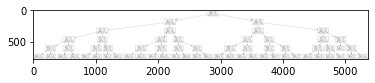

In [27]:
model = DecisionTreeClassifier(**dt_params).fit(x_train_norm[list(dtwval)], y_train)

y_pred = model.predict(x_test_norm[(dtwval)])


features = x_train_norm[(dtwval)].columns
dtree = DecisionTreeClassifier(**dt_params)
dtree = dtree.fit(x_train_norm[(dtwval)], y_train)

data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

Accuracy is:  0.7267294641952801
Sensitivity is:  0.7132752992383025
Specificity is:  0.7437485661849048


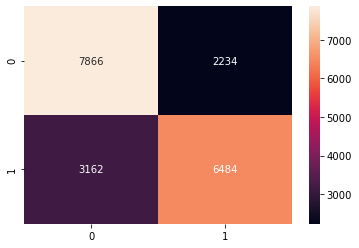

In [28]:
acdt = accuracy_score(y_test,y_pred)
print('Accuracy is: ',acdt)

cmdt = confusion_matrix(y_test,y_pred)
sns.heatmap(cmdt,annot=True,fmt="d")

sensitivitydt =  cmdt[0][0]/(cmdt[0][0]+cmdt[1][0])
print('Sensitivity is: ',sensitivitydt)

specificitydt =  cmdt[1][1]/(cmdt[1][1]+cmdt[0][1])
print('Specificity is: ',specificitydt)

In [29]:
final["DT"] = [acdt, sensitivitydt, specificitydt]

NameError: name 'final' is not defined

In [ ]:
final["Index"] = ["Accuracy", "Sensitivity", "Specificity"]
final.set_index("Index", inplace = True)

In [ ]:
import dataframe_image as dfi
dfi.export(final, 'Final.png')
dfi.export(resultados, 'ResultadosFS.png')
dfi.export(wrapper, 'Wrapper.png')
dfi.export(embedded, 'Embedded.png')
dfi.export(filter_, 'Filter.png')